In [1]:
import pandas as pd
import matplotlib.style as style
import matplotlib.pyplot as plt

In [2]:
exchange_rates = pd.read_csv('./datasets/euro-daily-hist_1999_2020.csv')
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [3]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar', 'Period\\Unit:': 'Time'}, inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [4]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts()  # 62 '-' characters

euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


In [5]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()


[13149. 13330. 13514. 13695. 13879. 14061. 14245. 14426. 14610.]
[1.1 1.2 1.3 1.4 1.5 1.6]


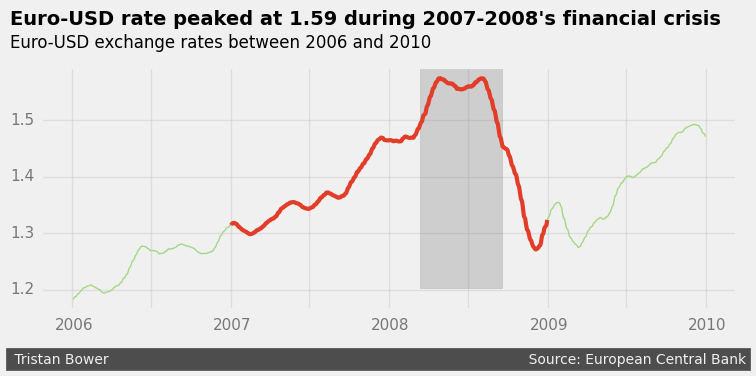

In [6]:
financial_crisis = euro_to_dollar.copy()[euro_to_dollar['Time'].dt.year.between(2006, 2009)]

financial_crisis_7_8 = euro_to_dollar.copy()[(euro_to_dollar.Time.dt.year >= 2007) 
                                             & (euro_to_dollar.Time.dt.year <= 2008)]
style.use('fivethirtyeight')

### Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['Time'], financial_crisis['rolling_mean'],
        linewidth=1, color='#A6D785')

### Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'], financial_crisis_7_8['rolling_mean'], 
        linewidth=3, color='#e23d28')

### Highlighting the peak of the crisis
print(ax.get_xticks())  # returns the x ticks as a list of locations
print(ax.get_yticks())  # returns the y ticks as a list of locations
ax.axvspan(xmin=13950, xmax=14140, ymin=0.09, alpha=0.3, color='grey')
    
### Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 13108
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(13005, y, rate, alpha=0.5, fontsize=11)
    y += 0.1

## Adding a title and a subtitle    
ax.text(13005, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis", weight='bold')
ax.text(13005, 1.63, 'Euro-USD exchange rates between 2006 and 2010', size=12)

### Adding a signature
ax.text(13005, 1.07, ' Tristan Bower' + ' '*96 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=10)

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

In [7]:
bush_obama_trump = euro_to_dollar.copy()[euro_to_dollar['Time'].dt.year.between(2001, 2020)]

bush = bush_obama_trump.copy()[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump.copy()[bush_obama_trump['Time'].dt.year.between(2009, 2016)]
trump = bush_obama_trump.copy()[bush_obama_trump['Time'].dt.year.between(2017, 2020)]

Below, we used Matplotlib's functional approach to build the graphs. We use this approach because it offers more flexibility in arranging the subplots:

We first build three of the graphs on a 2-by-3 grid (this grid should have six subplots, but we only build three; the bottom row remains empty).
We then build only the bottom graph on a 2-by-1 grid (this grid should have two subplots; the top row remains empty).
The two grids are merged, and we end up with three graphs on the top row and one graph on the bottom row.

[0.  0.2 0.4 0.6 0.8 1. ]
[1.  1.2 1.4 1.6]


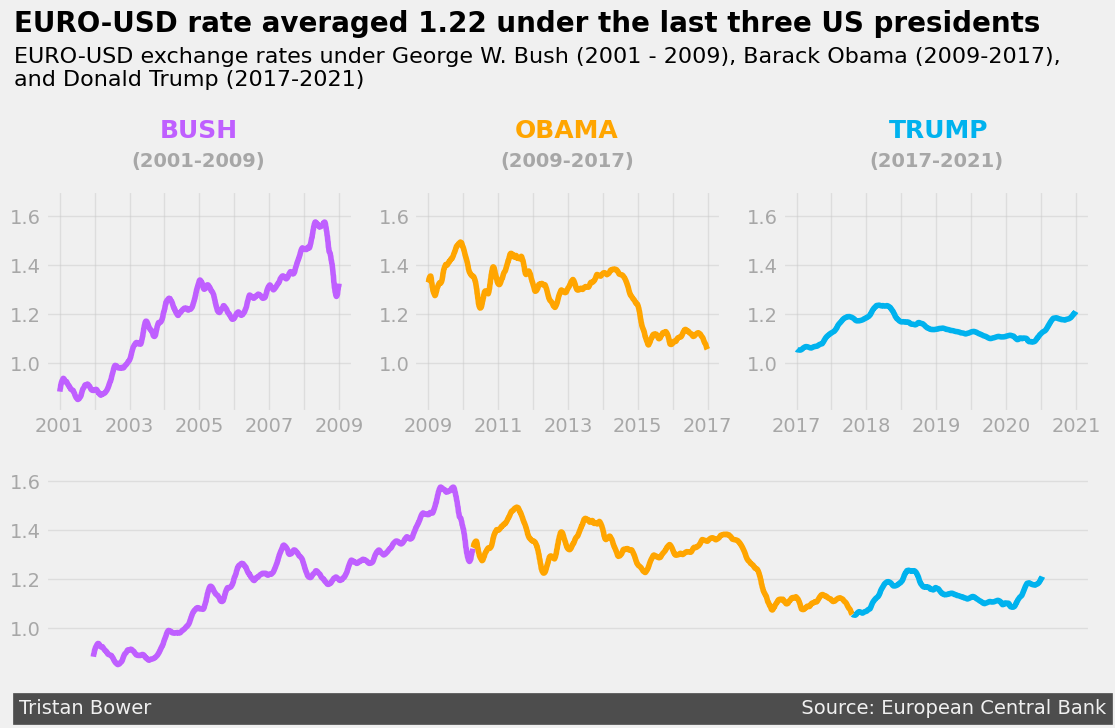

In [8]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 1, 2)
axes = [ax1, ax2, ax3, ax4]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'], alpha=0.3)
    ax.grid(alpha=0.5)


### Ax1: Bush
print(ax.get_xticks())
print(ax.get_yticks())

ax1.plot(bush['Time'], bush['rolling_mean'], color='#BF5FFF')
ax1.set_xticks(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009'])
ax1.set_xticklabels(['2001', '', '2003', '', '2005', '', '2007', '', '2009'], alpha=0.3)

ax1.text(12370, 1.92, 'BUSH', fontsize=18, weight='bold', color='#BF5FFF')
ax1.text(12070, 1.8, '(2001-2009)', weight='bold', alpha=0.3)


### Ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'], color='#ffa500')
ax2.set_xticks(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])
ax2.set_xticklabels(['2009', '', '2011', '', '2013', '', '2015', '', '2017'], alpha=0.3)

ax2.text(15150, 1.92, 'OBAMA', fontsize=18, weight='bold', color='#ffa500')
ax2.text(15000, 1.8, '(2009-2017)', weight='bold', alpha=0.3)


### Ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'], color='#00B2EE')
ax3.set_xticks(['2017-01', '2017-07', '2018-01', '2018-07', '2019-01', '2019-07', '2020-01', '2020-07', '2021-01'])
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2020', '', '2021'], alpha=0.3)

ax3.text(17650, 1.92, 'TRUMP', fontsize=18, weight='bold', color='#00B2EE')
ax3.text(17550, 1.8, '(2017-2021)', weight='bold', alpha=0.3)


### Ax4: Bush-Obama-Trump
ax4.plot(bush['Time'], bush['rolling_mean'], color='#BF5FFF')
ax4.plot(obama['Time'], obama['rolling_mean'], color='#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'], color='#00B2EE')

ax4.grid(alpha=0.5)
ax4.set_xticks([])


### Adding a title and a subtitle
ax1.text(10840, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(10840, 2.13, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''', fontsize=16)

### Adding a signature
ax4.text(10750, 0.65, 'Tristan Bower' + ' '*104 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=14)

plt.show()